<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [60]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [31]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [32]:
movies.dtypes  ## or movies.info()

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [33]:
movies.duration.mean()  ## or movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [34]:
movies.sort_values('duration')  ## or movies.describe() or movies.loc[:, 'duration'].sort_values()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

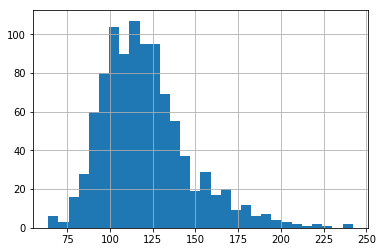

In [35]:
ax = movies.duration.hist(bins=30) ## or ax = movies.loc[:, 'duration'].hist(bins=30)

#### Use a box plot to display that same data.

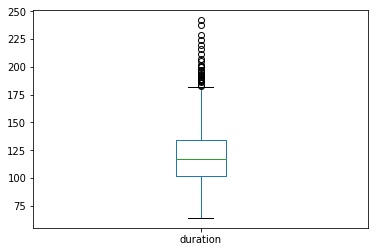

In [36]:
ax = movies.duration.plot(kind='box') ## or ax = movies.loc[:, 'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [37]:
movies.content_rating.value_counts() ## or movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Number of Movies by Rating')

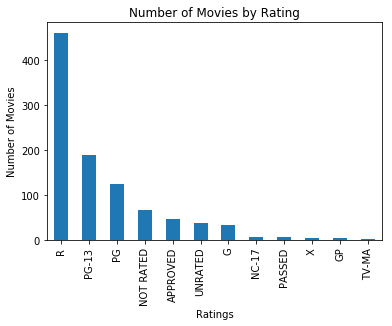

In [61]:
ax = movies.content_rating.value_counts().plot(kind='bar') ## or ratings = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies by Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [39]:
movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True) 
## or movies.loc[:,'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True)
movies.content_rating.value_counts() ## to validate the change

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [40]:
movies.loc[:, 'content_rating'].replace(['X','TV-MA'], 'NC-17', inplace=True) 
## or movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].value_counts() ## to validate the change

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [41]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [42]:
movies[movies.loc[:, 'content_rating'].isnull()] 
## or movies[movies.content_rating.isnull()] 
## to examine the missing values

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [43]:
movies.loc[:, 'content_rating'].fillna(value='PG', inplace=True)
## or movies.content_rating.fillna(value='PG', inplace=True)
movies[movies.loc[:, 'content_rating'].isnull()] ## to validate the null values are gone

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [44]:
print(movies[movies.duration >= 120].star_rating.mean())
print(movies[movies.duration < 120].star_rating.mean())
## or print(movies[movies.loc[:, 'duration'] >= 120].loc[:, 'star_rating'].mean())
## print(movies[movies.loc[:, 'duration'] < 120].loc[:, 'star_rating'].mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

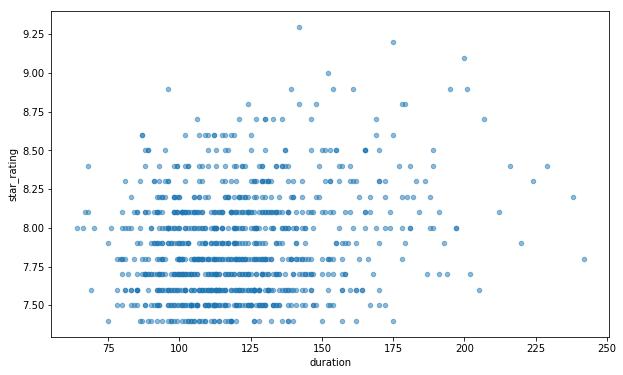

In [45]:
ax = movies.plot(kind='scatter', x='duration', y='star_rating', alpha=.5, figsize=(10,6))

#### Calculate the average duration for each genre.

In [46]:
movies.groupby('genre').agg({'duration':'mean'})
## or movies.groupby('genre').duration.mean()
## or movies.groupby('genre')['duration'].mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

In [ ]:
ax = movies.boxplot(column='duration', by='content_rating', figsize=(8,8))

#### Find the title of the movie with the highest star rating in each genre

In [50]:
highest_rating_by_genre = movies.groupby('genre')['star_rating'].max()
movies.merge(highest_rating_by_genre, on=['genre','star_rating'])  
## I'm sure there is another solution but I went with this because it calls out the ties

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
2,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
3,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
4,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
5,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
6,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
7,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
8,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
9,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [63]:
## alternate solution
## movies.title.value_counts()  or movies.duplicated('title').sum() or movies.loc[:, 'title'].value_count() -- this gives the count
## movies[movies.duplicated()]  -- this checks for rows in the dataframe that are exact duplicates, 
## but I prefer the visual verification below because there could actually be a duplicate movie with a bad value in a column
duplicated_movies = movies[movies.duplicated('title')].title
print(duplicated_movies)
movies.merge(duplicated_movies, on='title')

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object


,star_rating,title,content_rating,genre,duration,actors_list
0,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
1,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
2,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
3,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
4,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
5,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
6,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
7,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [52]:
movies.loc[:, 'genre'].value_counts() ## to determine which genres to use for the list
genres_more_than_ten = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
movies[movies.loc[:, 'genre'].isin(genres_more_than_ten)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [58]:
count_by_genre = movies.loc[:, 'genre'].value_counts()
movies[movies.loc[:, 'genre'].isin(count_by_genre[count_by_genre > 9].index)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [54]:
avg_rating = movies.groupby('genre')['star_rating'].mean()
avg_rating[movies.loc[:, 'genre'].value_counts() > 9]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [55]:
genre_count_avg = movies.groupby('genre')['star_rating'].agg(['count','mean'])
genre_count_avg[genre_count_avg.loc[:, 'count'] > 9]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!